In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1

## (a)

In [110]:
ff = pd.read_csv('data/F-F_Research_Data_Factors.csv')
avg_monthly_ff = ff['Mkt-RF'].diff().mean() # unsure if this means relative returns or average rate of return
volatility_ff = ff['Mkt-RF'].std()
sharpe_ratio_ff = (ff['Mkt-RF']/volatility_ff).mean()
print("The average monthly return of the market is ")
print(avg_monthly_ff)
print("the volatility is")
print(volatility_ff)
print("The average monthly Sharpe Ratio is")
print(sharpe_ratio_ff)

The average monthly return of the market is 
-0.004779982743744636
the volatility is
5.352554226265553
The average monthly Sharpe Ratio is
0.12519321055872606


## (b) 

In [111]:
sdf = pd.read_csv('data/ps1_strategies.csv')
avg_monthly_sdf = sdf.CA.diff().mean()
volatility_sdf = sdf.CA.std() # Not sure if this works for excess returns or if I need to subtract the risk free rate
sharpe_ratio_sdf = (sdf.CA/volatility_sdf).mean()
print("The average monthly return of the CA is")
print(avg_monthly_sdf)
print("the volatility is")
print(volatility_sdf)
print("The average monthly Sharpe Ratio is")
print(sharpe_ratio_sdf)

The average monthly return of the CA is
0.015342584869578116
the volatility is
2.6293585544149796
The average monthly Sharpe Ratio is
0.27914421507930354


## (c)

In [112]:
def generate_capm(rpmrf, rm=ff['Mkt-RF']+ff.RF, rf=ff.RF):
    '''
    rp: excess return of the portfolio
    rm: excess return of the market
    rf: risk free rate
    '''
    beta = np.cov((rpmrf+rf), rm)[0, 1]/np.var(rm)
    alpha = np.mean(rpmrf) - beta*np.mean(rm - rf)
    return beta, alpha

## (d)

In [113]:
ff_trim = ff[ff['Month'] >= sdf['date'].min()]
ff_trim = ff_trim[ff_trim['Month'] <= sdf['date'].max()] 
ff_trim = ff_trim.reset_index(drop=True)


In [114]:
beta, alpha = generate_capm(sdf.CA.to_numpy(), (ff_trim['Mkt-RF'] + ff_trim['RF']).to_numpy(), ff_trim.RF.to_numpy())
print("The beta of the CA is")
print(beta)
print("The alpha of the CA is")
print(alpha)

The beta of the CA is
0.48846335461929824
The alpha of the CA is
0.3981855091562549


In [115]:
returns = ff_trim.RF + beta*ff_trim['Mkt-RF']

## (f)
does he want excess or total returns?

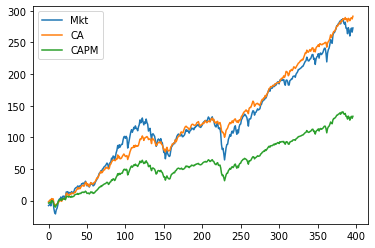

In [116]:
#plot cumulative returns, market cumulative returns, and CA cumulative returns
plt.plot(ff_trim['Mkt-RF'].cumsum(), label='Mkt')
plt.plot(sdf.CA.cumsum(), label='CA')
plt.plot((returns - ff_trim.RF).cumsum(), label='CAPM')
plt.legend()

## (g)
Despite having a high alpha value, it seems that CA would not make a good hedge fund strategy as it follows the market pretty closely. It would seem that CAPM is not an appropriate model for this strategy.